In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Advertising.csv")

In [7]:
len(df)

200

In [4]:
df.TV.describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [11]:
max_thres=df.TV.quantile(0.001)

In [12]:
max_thres

1.3765999999999998

In [13]:
df[df.TV==max_thres]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [30]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [31]:
df.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [32]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [33]:
df=df[df.Newspaper<df["Newspaper"].mean()+3*(df["Newspaper"].std())]

In [34]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [35]:
x=df.drop("Sales",axis=1)

In [36]:
y=df["Sales"]

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
s=StandardScaler()

In [39]:
X=s.fit_transform(x)

In [55]:
jh=pd.DataFrame(X)

In [56]:
jh.head()

,0,1,2
0,0.978697,0.989521,1.932998
1,-1.199012,1.090705,0.751313
2,-1.519332,1.535913,1.937901
3,0.056456,1.225616,1.408349
4,0.400243,-0.831784,1.403446


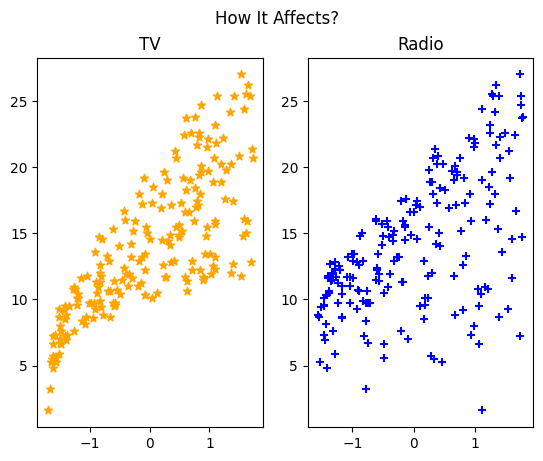

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(jh[0],y,color="orange",marker="*")
ax[1].scatter(jh[1],y,color="blue",marker="+")
# plot 2 subplots
ax[0].set_title('TV')
ax[1].set_title('Radio')
fig.suptitle('How It Affects?')
plt.show()

In [48]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [17]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=12,test_size=0.2)

In [42]:
x_train.shape

(158, 3)

In [49]:
sdv=LinearRegression()

In [50]:
sdv.fit(x_train,y_train)

LinearRegression()

In [51]:
sdv.score(x_test,y_test)

0.9002147591940638

In [52]:
y_pred=sdv.predict(x_test)

In [53]:
from sklearn import metrics
LinearRegression_MAE = metrics.mean_absolute_error(y_test,y_pred)
LinearRegression_MSE = metrics.mean_squared_error(y_test,y_pred)
LinearRegression_R2 = metrics.r2_score(y_test,y_pred)

In [54]:
Report = pd.DataFrame({"MAE":[LinearRegression_MAE],"MSE":[LinearRegression_MSE],"R2":[LinearRegression_R2]})
print("LINEAR MODEL:")
print(Report)

LINEAR MODEL:
        MAE       MSE        R2
0  1.265902  2.653389  0.900215
